# TASK 8.3
Zadanie: przestępczość

1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

### import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### ZESTAWIENIE INTERWENCJI ZE WZGLĘDU RASĘ I OBJAWY CHOROBY PSYCHICZNEJ

In [3]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [42]:
df['race'].fillna('Not know', inplace = True)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,Not know,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,Not know,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [5]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'Not know', 'N'], dtype=object)

In [6]:
count_all = df.groupby(['race']).count()
count_all_id = count_all['id']
count_all_id

race
A             93
B           1298
H            902
N             78
Not know     521
O             48
W           2476
Name: id, dtype: int64

In [7]:
table_acording_race_analysis_by_signs_of_mental_illness = df.pivot_table(index = 'race', columns = 'signs_of_mental_illness', aggfunc = 'count')
victims_with_signs_of_mental_illness = table_acording_race_analysis_by_signs_of_mental_illness[('id',  True)]
victims_with_signs_of_mental_illness

race
A            24
B           184
H           157
N            14
Not know    113
O            11
W           713
Name: (id, True), dtype: int64

In [8]:
join_all_and_with_signs_of_mental_illness = {'all': count_all_id,
     'signs_of_mental_illness': victims_with_signs_of_mental_illness}
number_of_victims = pd.DataFrame(join_all_and_with_signs_of_mental_illness)
number_of_victims

,all,signs_of_mental_illness
race,,
A,93,24
B,1298,184
H,902,157
N,78,14
Not know,521,113
O,48,11
W,2476,713


In [9]:
# define funcion to calculate 
def calculate_percent_of_victims_with_signs_of_mental_illness(row):
    row['percent_of_victims_with_signs_of_mental_illness, %'] = 100 * row['signs_of_mental_illness'] / row ['all']
    return row

In [10]:
number_of_victims = number_of_victims.apply(calculate_percent_of_victims_with_signs_of_mental_illness, axis = 1)
number_of_victims

,all,signs_of_mental_illness,"percent_of_victims_with_signs_of_mental_illness, %"
race,,,
A,93.0,24.0,25.806452
B,1298.0,184.0,14.175655
H,902.0,157.0,17.405765
N,78.0,14.0,17.948718
Not know,521.0,113.0,21.689060
O,48.0,11.0,22.916667
W,2476.0,713.0,28.796446


In [11]:
the_most_percent_victims_with_signs_of_mental_illness_value = number_of_victims['percent_of_victims_with_signs_of_mental_illness, %'].max()
the_most_percent_victims_with_signs_of_mental_illness_race = number_of_victims['percent_of_victims_with_signs_of_mental_illness, %'].idxmax()
print(f"The hight percent of victims with signs of mental illness {the_most_percent_victims_with_signs_of_mental_illness_value:.2f}% is for race {the_most_percent_victims_with_signs_of_mental_illness_race}.")

The hight percent of victims with signs of mental illness 28.80% is for race W.


#### ANSWER 
W tabeli zestawiono dane dla ofiar interwencji dla poszczególnych ras w zestawieniu całościowym, ilości osób u której były oznaki choroby psychicznej oraz procent jaki stanowiły takie osoby. Na koniec pokazano, u której rasy oznaki choroby psychicznej występowały najczęściej.

In [12]:
print(f"Table of results \n {number_of_victims}")
print("-" * 50)
print(f"The hight percent of victims with signs of mental illness {the_most_percent_victims_with_signs_of_mental_illness_value:.2f}% is for race {the_most_percent_victims_with_signs_of_mental_illness_race}.")

Table of results 
              all  signs_of_mental_illness  \
race                                        
A           93.0                     24.0   
B         1298.0                    184.0   
H          902.0                    157.0   
N           78.0                     14.0   
Not know   521.0                    113.0   
O           48.0                     11.0   
W         2476.0                    713.0   

          percent_of_victims_with_signs_of_mental_illness, %  
race                                                          
A                                                 25.806452   
B                                                 14.175655   
H                                                 17.405765   
N                                                 17.948718   
Not know                                          21.689060   
O                                                 22.916667   
W                                                 28.796446   
--------

### ZESTAWIENIE INTERWENCJI ZE WZGLĘDU NA DZIEŃ TYGODNIA

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
interversion_by_day_of_week = df.pivot_table(index = 'day_of_week', aggfunc = 'count')['id']
interversion_by_day_of_week

day_of_week
Friday       761
Monday       726
Saturday     721
Sunday       753
Thursday     810
Tuesday      816
Wednesday    829
Name: id, dtype: int64

In [14]:
y_data = interversion_by_day_of_week.to_numpy()
y_data

array([761, 726, 721, 753, 810, 816, 829])

In [15]:
x_data = interversion_by_day_of_week.index.to_numpy()
x_data

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

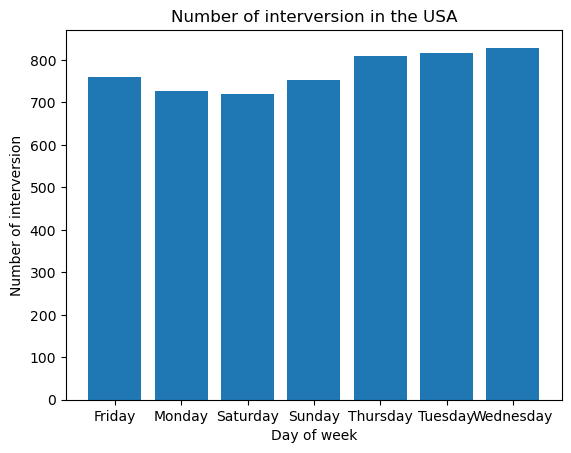

In [16]:
plt.bar(x_data, y_data)
 
plt.xlabel('Day of week')
plt.ylabel('Number of interversion')
plt.title('Number of interversion in the USA')

# Show graphic
plt.show();

### ZESTAWIENIE DODATKOWYCH DANYCH Z UWZGLĘDNIENIEM STANU, W KTÓRYM DOSZŁO DO INTERWENCJI ORAZ ZESTAWIENIE ILOŚCI INTERWENCJI ZE WZGLĘDU NA ILOŚĆ MIESZKAŃCÓW

import data with number of inhabitants

In [20]:
population_data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header = 0)

In [118]:
number_of_inhabitants_in_state = population_data[0][['State', 'Population estimate, July 1, 2019[2]']]
number_of_inhabitants_in_state.rename(columns = {'State' : 'state', 'Population estimate, July 1, 2019[2]' : 'population'}, inplace = True)
number_of_inhabitants_in_state.head()

/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_97220/4240865071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_of_inhabitants_in_state.rename(columns = {'State' : 'state', 'Population estimate, July 1, 2019[2]' : 'population'}, inplace = True)


,state,population
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989


In [35]:
state_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header = 0)

In [46]:
state_symbols = state_data[0]
state_symbols.rename(columns = {'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)' : 'state', 'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5' : 'symbol'}, inplace = True)
symbols_of_state = state_symbols[['state', 'symbol']]
symbols_of_state = symbols_of_state.dropna()
#symbols_of_state.drop(8, axis = 0, inplace = True)
symbols_of_state

,state,symbol
8,Name and status of region,USPS
11,Alabama,AL
12,Alaska,AK
13,Arizona,AZ
14,Arkansas,AR
...,...,...
83,Nebraska,NB
84,Northern Mariana Islands,CM
85,Panama Canal Zone,CZ
86,Philippine Islands,PI


In [80]:
merge_state_info = pd.merge(number_of_inhabitants_in_state, symbols_of_state, on = 'state')
merge_state_info.sort_values(by = ['state'], inplace = True)
merge_state_info.head()

,state,population,symbol
23,Alabama,4903185,AL
49,Alaska,731545,AK
55,American Samoa,55641,AS
13,Arizona,7278717,AZ
33,Arkansas,3017825,AR


In [91]:
merge_all_tables = pd.merge(df, merge_state_info, left_on='state', right_on='symbol')
merge_all_tables.rename(columns = {'state_y' : 'state'}, inplace = True)
intervation_in_state = merge_all_tables[['state', 'population', 'symbol']]
intervation_in_state_by_state = intervation_in_state.pivot_table(index = 'state', aggfunc = 'count')
intervation_in_state_by_state.drop(columns = ['population'], inplace = True)
intervation_in_state_by_state.rename(columns = {'symbol' : 'number_of_interventions'}, inplace = True)
intervation_in_state_by_state.sort_index(inplace = True)
intervation_in_state_by_state.head()

,number_of_interventions
state,
Alabama,104
Alaska,39
Arizona,254
Arkansas,83
California,799


In [114]:
col1 = intervation_in_state_by_state.index
col2 = intervation_in_state_by_state['number_of_interventions']
intervertions_by_state = pd.DataFrame([col1, col2]).transpose()
intervertions_by_state.rename(columns = {0 : 'state', 1 : 'number_of_interversion'}, inplace = True)
intervertions_by_state.head()

,state,number_of_interversion
0,Alabama,104
1,Alaska,39
2,Arizona,254
3,Arkansas,83
4,California,799


In [116]:
state_population_and_interversions_by_state = pd.merge(intervertions_by_state, merge_state_info, on = 'state')
state_population_and_interversions_by_state.head()

,state,number_of_interversion,population,symbol
0,Alabama,104,4903185,AL
1,Alaska,39,731545,AK
2,Arizona,254,7278717,AZ
3,Arkansas,83,3017825,AR
4,California,799,39512223,CA


In [117]:
# add columns calculate number of fatal interventions per 1000 inhabitants
def calculate_fatal_interventions_per_1000_inhabitans(row):
    row['number_of_fatal_interventions_per_1000_inhabitants'] = 1000 * row['number_of_interversion'] / row ['population']
    return row

In [135]:
state_population_and_interversions_by_state = state_population_and_interversions_by_state.apply(calculate_fatal_interventions_per_1000_inhabitans, axis = 1)
state_population_and_interversions_by_state.head()

,state,number_of_interversion,population,symbol,number_of_fatal_interventions_per_1000_inhabitants
0,Alabama,104,4903185,AL,0.021211
1,Alaska,39,731545,AK,0.053312
2,Arizona,254,7278717,AZ,0.034896
3,Arkansas,83,3017825,AR,0.027503
4,California,799,39512223,CA,0.020222


In [123]:
#prepare data to show results
x_states = state_population_and_interversions_by_state['symbol']
y_number_of_interversion_per_1000 = state_population_and_interversions_by_state['number_of_fatal_interventions_per_1000_inhabitants']

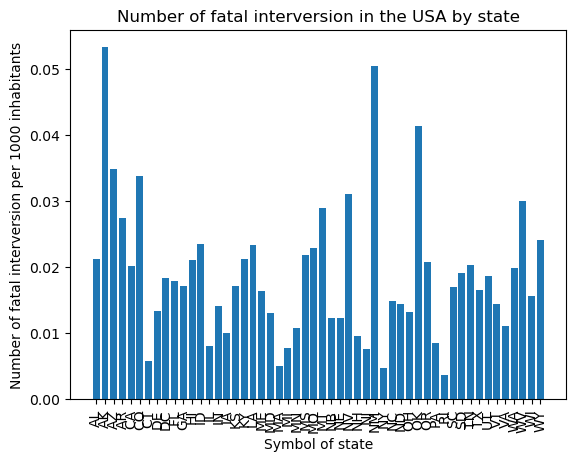

In [128]:
plt.bar(x_states, y_number_of_interversion_per_1000)
 
plt.xlabel('Symbol of state')
plt.ylabel('Number of fatal interversion per 1000 inhabitants')
plt.title('Number of fatal interversion in the USA by state')
#plt.figure().set_figwidth(20000)
plt.xticks(rotation=90)

# Show graphic
plt.show();

### Analysis
Szybka analiza wyników pod kątem pytań w poleceniach:
"RACE
A American Native or Alaskan Native *
B Black or African American
P Pacific Islander including Native Hawaiian
S Asian
W White
O Unknown,

ETHNICITY
H Hispanic or Latino
N Not Hispanic or Latino
'H' should be selected if a person chooses to identify himself as Hispanic or Latino.
'N' should be selected if a person chooses to identify himself as an ethnicity other than Hispanic or Latino. Only one ethnicity choice is allowed, i.e., a person cannot select both 'H' and 'N'"
źródło: https://www.dcf.ks.gov/services/PPS/Documents/PPM_Forms/Section_5000_Forms/PPS5460_Instr.pdf
#### ANALIZA POD KĄTEM RASY
Analiza pod kątem rasy pokazała, że najwięcej interwencji śmiertelnych było z udziałem rasy 'W' - białej, najmniej z udziałem rasy 'O' - nieznana. Procentowo ilość ofiar wykazujących chorobę psychiczną również największa jest wśród rasy białej, jednak rasa 'B' - czarna wykazywała najmniejszy odsetek ofiar z oznakami choroby psychicznej. Jeżeli połączono by nieuzupełnione dane odnośnie rasy (oznaczenie 'not know') z '0', które również oznacza nieznaną rasę, wówczas ilość interwencji śmiertelnych dla nieznanej rasy zwiększa się znacząco i najmniej takich interwencji stanowiły by osoby z rasą 'N', czyli definiującą się jako osobę nie latynowską, co mówi nam tylko o pochodzeniu etnicznym, a nie rasie samej w sobie.
#### ANALIZA INTERWENCJI ZE WZGLĘDU NA DZIEŃ TYGODNIA
Analizując interwencję pod względem dnia tygodnia zauważamy, że śmiertelnych interwencji najwięcej było w środy, a najmniej w soboty. Może być to ciekawe i należało by szerzej przeanalizować czemu akurat w środy jest najwięcej interwencji śmiertelnych. Dobrze było by dodatkowo zestawić te dane z ilością interwencji ogółem i porównać czy ogólnie środy wypadają na dzień największej ilości interwencji. Można by również doszukać się przyczyny czemu środy wypadają tak słabo w porównaniu z pozostałymi dniami tygodnia. Warto również zauważyć, że ilość interwencji przypadających na dzień tygodnia wacha się od minimalnej wartości 721 dla soboty, do 829 dla środy.
#### ANALIZA INTERWENCJI W ZALEŻNOŚCI OD STANU
Analizując ilość śmiertelnych interwencji przypadających na 1000 mieszkańców danego stanu najkorzystniej w zestawieniu wypada Rhode Island z wynikiem 0.003776 śmiertelnych interwencji na 1000 mieszkańców. Rohde Island charakteryzuje się również najmniejszą ilością interwencji śmiertelnych ogólnie. Najgorzej w takim zestawieniu wypada Alaska z wynikiem 0.053312 śmiertelnych interwencji na 1000 mieszkańców. Nie mniej jednak tych interwencji było 39, co w porównaniu z California, gdzie doszło aż do 799 takich interwencji daje ponad 20 razy mniej takich interwencji.
Średnia ilość interwencji przypadająca na 1000 mieszkańców w danym stanie wynosi 0.018898, co oznacza, że średnio na Alasce dochodzi do prawie 3 razy większej (2.82) ilości śmiertelnych interwencji niż w innych stanach (odnosząc się do średniej). W każdym stanie dokonano średnio 105 (104.615385) interwencji. Analizując tylko ilość interwencji, najgorzej w tym zestawieniu wypada California z ilością 799 interwencji, a drugi jest Texas z 481 interwencjami śmiertelnymi. Jednak już w przeliczeniu na 1000 mieszkańców California ma wynik 0.020222, a Texas 0.016589 intewencji śmiertelnych na 1000 mieszkańców.

Można by się pokusić o dodatkową analizę ilości interwencji śmiertelnych do ilości wszystkich interwencji jakie miały miejsce w danym stanie, oraz uwzględnić ilość mieszkańców danego stanu. Da to pełniejszy obraz oraz można pokusić się wówczas o hipotezę wytypowania "najbezpieczniejszego" oraz "najmniej bezpiecznego" stanu.

In [143]:
# analysis by race
number_of_victims

,all,signs_of_mental_illness,"percent_of_victims_with_signs_of_mental_illness, %"
race,,,
A,93.0,24.0,25.806452
B,1298.0,184.0,14.175655
H,902.0,157.0,17.405765
N,78.0,14.0,17.948718
Not know,521.0,113.0,21.689060
O,48.0,11.0,22.916667
W,2476.0,713.0,28.796446


In [144]:
# analysis by day of week
interversion_by_day_of_week

day_of_week
Friday       761
Monday       726
Saturday     721
Sunday       753
Thursday     810
Tuesday      816
Wednesday    829
Name: id, dtype: int64

In [145]:
# analysis by day of week - describe
interversion_by_day_of_week.describe()

count      7.000000
mean     773.714286
std       44.361073
min      721.000000
25%      739.500000
50%      761.000000
75%      813.000000
max      829.000000
Name: id, dtype: float64

In [146]:
# analysis by state
state_population_and_interversions_by_state

,state,number_of_interversion,population,symbol,number_of_fatal_interventions_per_1000_inhabitants
0,Alabama,104,4903185,AL,0.021211
1,Alaska,39,731545,AK,0.053312
2,Arizona,254,7278717,AZ,0.034896
3,Arkansas,83,3017825,AR,0.027503
4,California,799,39512223,CA,0.020222
5,Colorado,195,5758736,CO,0.033862
6,Connecticut,21,3565287,CT,0.005890
7,Delaware,13,973764,DE,0.013350
8,District of Columbia,13,705749,DC,0.018420
9,Florida,350,19453561,FL,0.017992


In [139]:
# analysis by state - describe
state_population_and_interversions_by_state.describe()

,number_of_interversion,population,number_of_fatal_interventions_per_1000_inhabitants
count,52.000000,5.200000e+01,52.000000
mean,104.615385,6.350672e+06,0.018898
std,130.949647,7.314919e+06,0.010474
min,4.000000,5.787590e+05,0.003776
25%,30.750000,1.790876e+06,0.012407
50%,81.000000,4.342705e+06,0.017152
75%,108.250000,7.362761e+06,0.022124
max,799.000000,3.951222e+07,0.053312
